# plasmapy.physics.distribution
We import the usual and the hero of this notebook, the Maxwellian 1D distribution:

In [1]:
import numpy as np
from astropy import units as u
import plasmapy
import matplotlib.pyplot as plt
from plasmapy.constants import (m_p, m_e, c, mu0, k_B, e, eps0, pi, e)
%matplotlib inline 
from plasmapy.physics.distribution import Maxwellian_1D

Given we'll be plotting:

In [2]:
from astropy.visualization import quantity_support
quantity_support() 

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb266fdd588>

Let's get the probability density of finding an electron at 1 m/s if we have a plasma at 30 000 K:

In [3]:
Maxwellian_1D(v=1*u.m/u.s, T= 30000*u.K, particle='e',V_drift=0*u.m/u.s)

<Quantity 5.916329687405701e-07 s / m>

Note the units! Integrated over velocities, this will give us a probability. Let's test that for a bunch of particles:

Integral value for p: 0.9999999999999998
Integral value for e: 0.9999999999998787


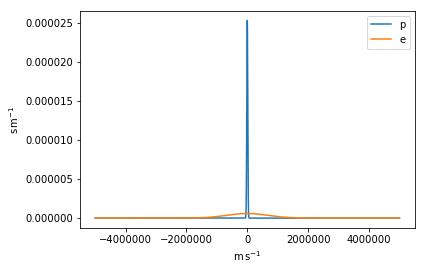

In [4]:
# With a vector (from Numpy)
start = -500000
stop = -start
v = np.arange(start,stop) * 10 * u.m/u.s
dv = v[1] - v[0]

#Test the normationation to 1
for particle in ['p', 'e']:
    pdf = Maxwellian_1D(v,T= 30000*u.K, particle=particle)
    integral = (pdf).sum() * dv
    print(f"Integral value for {particle}: {integral}")
    plt.plot(v, pdf, label=particle)
plt.legend()

The standard deviation of this distribution should give us back our temperature:

In [5]:

T =  30000*u.K
std = np.sqrt((Maxwellian_1D(v,T=T, particle='e')*v**2*dv).sum())
T_theo = (std**2/k_B*m_e).to(u.K)

print(T_theo/T)

0.9999999999930749


And the center of the distribution is, as can be seen below:

In [6]:
T_e = 30000*u.K
V_drift = 10*u.m/u.s

start = -5000
stop = - start
dv = 10000 * u.m/u.s

v_vect = np.arange(start,stop,dtype='float64')* dv

v_vect[Maxwellian_1D(v_vect,T=T_e, particle='e',V_drift = 0*u.m/u.s ).argmax()]

<Quantity 0.0 m / s>